<a href="https://colab.research.google.com/github/SergiuTULUC/Projekt-Klasifikace/blob/main/projekt2_klasifikace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt 2 - klasifikace


In [ ]:
!pip install ydata-profiling
!pip install lazypredict

In [ ]:
pip install dask[dataframe]


# Připrava knihoven a odkaz na data

In [ ]:
# preprocessing a analýza dat
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# modely
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from lazypredict.Supervised import LazyClassifier
# metriky
from sklearn.metrics import recall_score, roc_auc_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve
# plot
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/arifmia/heart-attack-risk-dataset/data?select=heart_attack_risk_dataset.csv

Po prvním spuštení importu knihoven narazili jsme na problém chybějícího balíčku dask[dataframe]
Příprava dat

# Připrava proměnných pro další analýzu

In [ ]:
# konstanty -> přepínače, jestli chci nebo nechci provést akci
# např. spustit pandas profiling -> vytvořit okýnko s explorativní analýzou
DATA_REPORT = False
# nebo jestli chci použít všechna data nebo udělat vzorek
VZOREK_DAT = True
VELIKOST_VZORKU = 10000
# vybrat feautury podle výsledků korelace?
APLIKOVAT_KORELACI = True
TRESHOLD = 0.0002
# chci upscalovat méně početnou třídu?
SMOTE_UPSCALING = True

# Načíst data

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SergiuTULUC/Projekt-Klasifikace/refs/heads/main/heart_attack_risk_dataset.csv')
dataset_init = pd.read_csv('https://raw.githubusercontent.com/SergiuTULUC/Projekt-Klasifikace/refs/heads/main/heart_attack_risk_dataset.csv')
dataset

Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level  \
0       69  Female        1                    0                Moderate   
1       32    Male        0                    0                Moderate   
2       89    Male        0                    1                Moderate   
3       78    Male        0                    1                Moderate   
4       38  Female        1                    0                Moderate   
...    ...     ...      ...                  ...                     ...   
49995   21    Male        0                    0                     Low   
49996   35  Female        0                    0                     Low   
49997   46    Male        0                    1                    High   
49998   56    Male        0                    1                     Low   
49999   72    Male        0                    0                    High   

        BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP  \
0     34.61         1             0             152.10         171   
1     22.75         0             0             166.80         126   
2     35.32         0             0             272.30         123   
3     18.23         1             0             237.70         144   
4     19.82         0             0             207.70         123   
...     ...       ...           ...                ...         ...   
49995 39.93         0             0             269.90         171   
49996 18.10         0             0             235.80         146   
49997 21.42         0             0             172.80         146   
49998 29.93         0             0             244.10         151   
49999 30.85         0             0             191.80         142   

       Heart_Rate  Family_History Stress_Level Chest_Pain_Type  \
0              85               0     Moderate     Non-anginal   
1             103               0          Low    Asymptomatic   
2             127               0          Low         Typical   
3             125               0          Low         Typical   
4             107               0         High    Asymptomatic   
...           ...             ...          ...             ...   
49995         113               0         High         Typical   
49996          71               0     Moderate     Non-anginal   
49997          85               1          Low         Typical   
49998         110               0          Low    Asymptomatic   
49999          70               0         High    Asymptomatic   

             Thalassemia  Fasting_Blood_Sugar                   ECG_Results  \
0      Reversible defect                    0                        Normal   
1                 Normal                    0              ST-T abnormality   
2      Reversible defect                    0              ST-T abnormality   
3           Fixed defect                    1  Left Ventricular Hypertrophy   
4      Reversible defect                    0              ST-T abnormality   
...                  ...                  ...                           ...   
49995  Reversible defect                    0              ST-T abnormality   
49996       Fixed defect                    1              ST-T abnormality   
49997       Fixed defect                    0  Left Ventricular Hypertrophy   
49998  Reversible defect                    0                        Normal   
49999             Normal                    0              ST-T abnormality   

       Exercise_Induced_Angina  Max_Heart_Rate_Achieved Heart_Attack_Risk  
0                            0                      114               Low  
1                            0                      173          Moderate  
2                            0                      109               Low  
3                            0                      129               Low  
4                            0                      124          Moderate  
...                        ...                      ...

# Explorativní analýza

Kontrola dat, nulových hodnot, typu proměnných...
Data typu object, která budeme používat při analýze hypotéz budeme převádět na číselný formát.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

# Analýza extremních hodnot

In [ ]:
dataset.describe().T

count   mean   std    min    25%    50%    75%  \
Age                     50000.00  53.40 20.80  18.00  35.00  53.00  71.00   
Smoking                 50000.00   0.30  0.46   0.00   0.00   0.00   1.00   
Alcohol_Consumption     50000.00   0.40  0.49   0.00   0.00   0.00   1.00   
BMI                     50000.00  27.52  7.23  15.00  21.27  27.54  33.77   
Diabetes                50000.00   0.20  0.40   0.00   0.00   0.00   0.00   
Hypertension            50000.00   0.30  0.46   0.00   0.00   0.00   1.00   
Cholesterol_Level       50000.00 225.04 43.32 150.00 187.30 225.10 262.60   
Resting_BP              50000.00 134.43 25.91  90.00 112.00 134.00 157.00   
Heart_Rate              50000.00  94.53 20.19  60.00  77.00  94.00 112.00   
Family_History          50000.00   0.30  0.46   0.00   0.00   0.00   1.00   
Fasting_Blood_Sugar     50000.00   0.15  0.36   0.00   0.00   0.00   0.00   
Exercise_Induced_Angina 50000.00   0.20  0.40   0.00   0.00   0.00   0.00   
Max_Heart_Rate_Achieved 50000.00 149.31 28.82 100.00 124.00 149.00 174.00   

                           max  
Age                      89.00  
Smoking                   1.00  
Alcohol_Consumption       1.00  
BMI                      40.00  
Diabetes                  1.00  
Hypertension              1.00  
Cholesterol_Level       300.00  
Resting_BP              179.00  
Heart_Rate              129.00  
Family_History            1.00  
Fasting_Blood_Sugar       1.00  
Exercise_Induced_Angina   1.00  
Max_Heart_Rate_Achieved 199.00

Ted provedeme analýzu sloupců "objektů"

In [ ]:
dataset.describe(include="object").T

count unique       top   freq
Gender                   50000      2    Female  25086
Physical_Activity_Level  50000      3       Low  20061
Stress_Level             50000      3  Moderate  24971
Chest_Pain_Type          50000      4   Typical  12642
Thalassemia              50000      3    Normal  16797
ECG_Results              50000      3    Normal  16799
Heart_Attack_Risk        50000      3       Low  25024

In [ ]:
if DATA_REPORT:
  profile = ProfileReport(dataset)
  profile.to_notebook_iframe()

- podezřelé hodnoty -> nejsou
- chybějící data -> nejsou
- převody datových typů - ano
- Feature engineering - na vás
- škálování - ano
- rozdělení train/test

In [ ]:
num_col = dataset.select_dtypes(include='number').columns


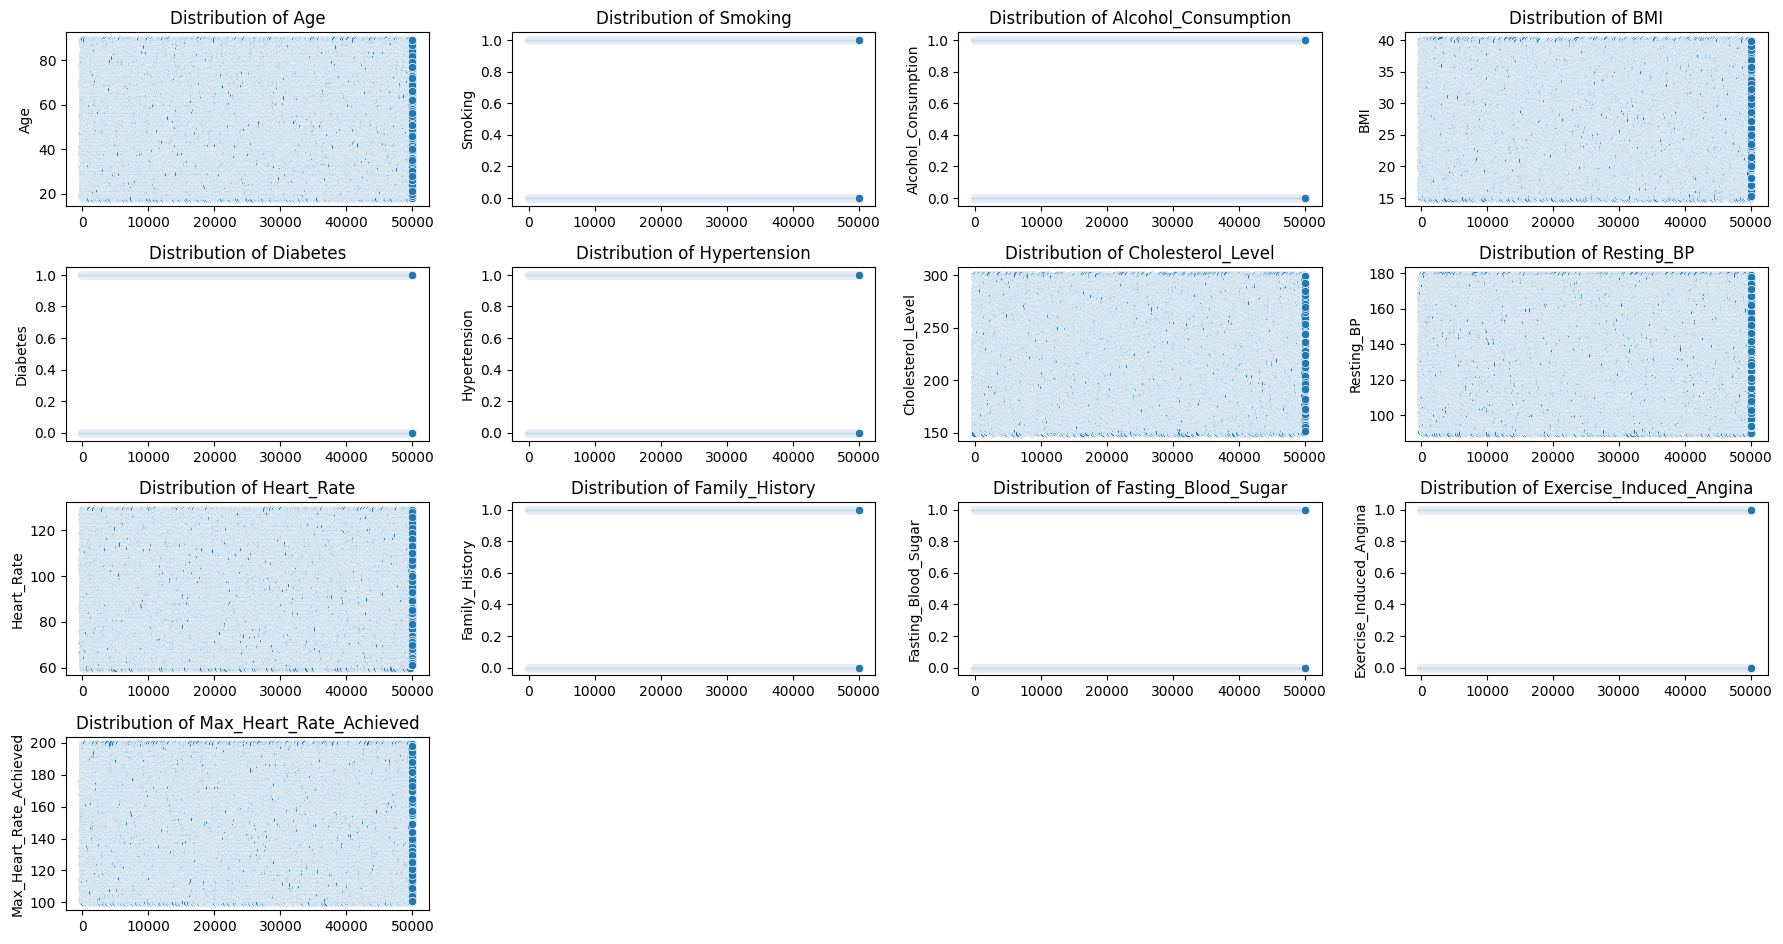

In [ ]:
plt.figure(figsize=(18,14))

for i, col in enumerate(num_col,1):
    plt.subplot(6,4,i)
    sns.scatterplot(dataset[col], palette='gray')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

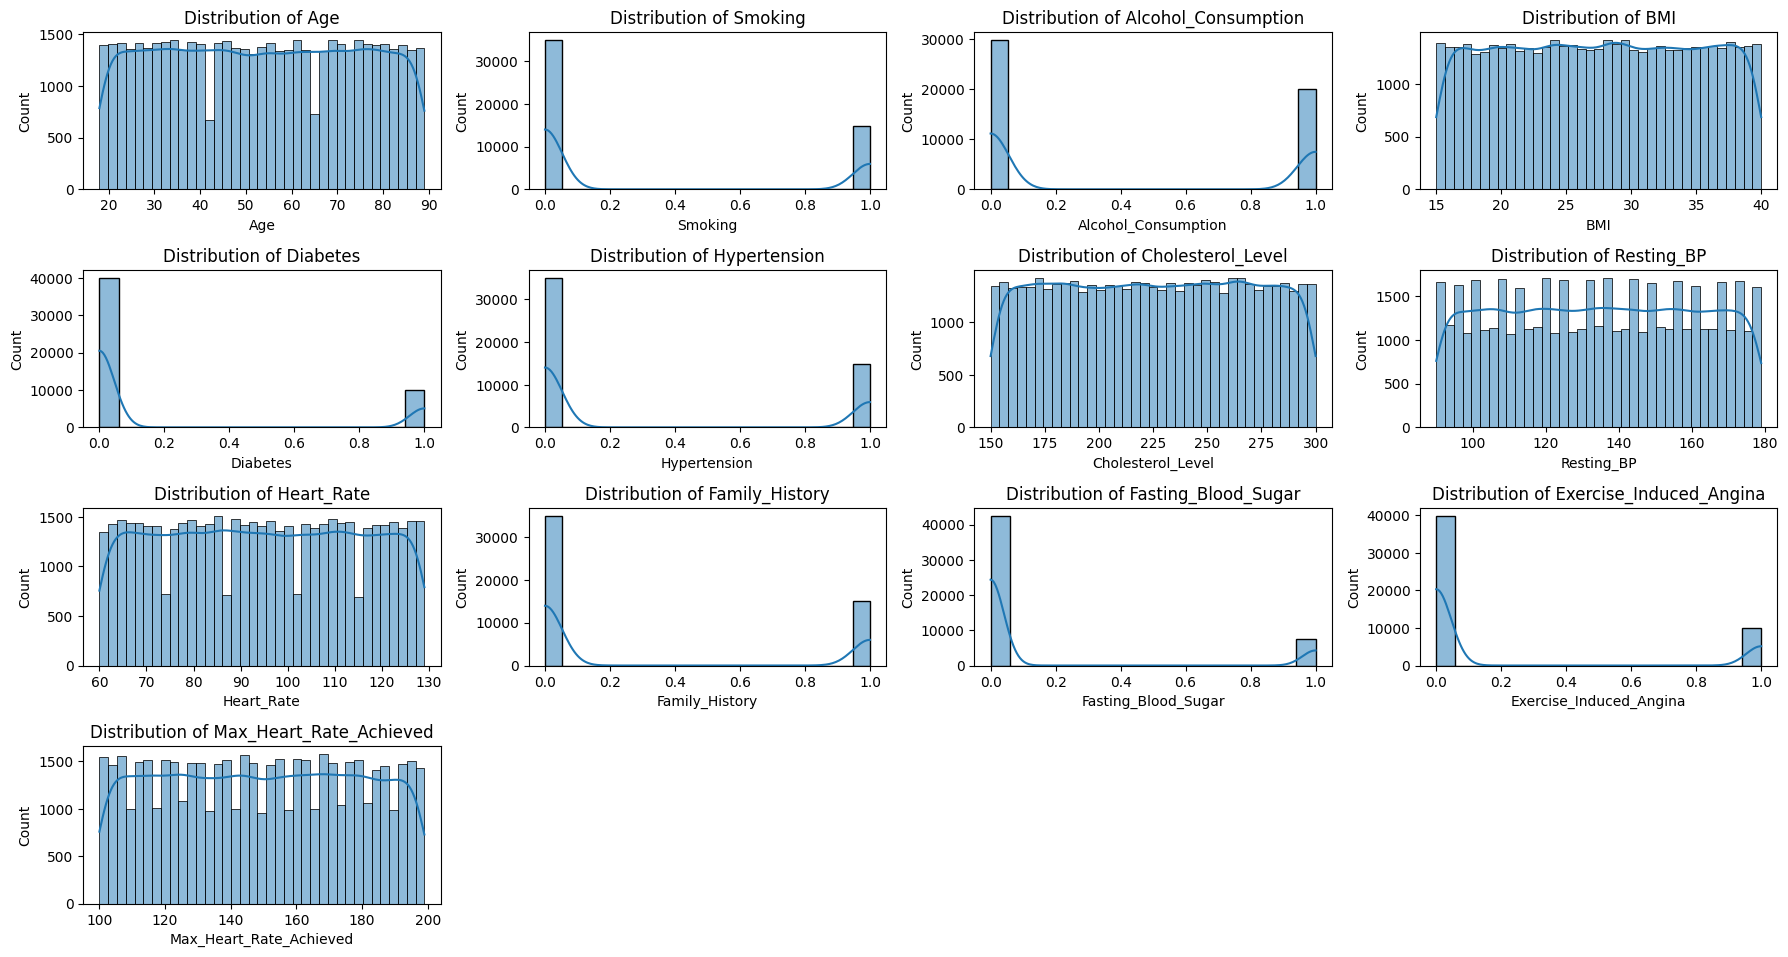

In [ ]:
plt.figure(figsize=(18,14))

for i, col in enumerate(num_col,1):
    plt.subplot(6,4,i)
    sns.histplot(dataset[col], kde=True, palette='gray')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Outliery

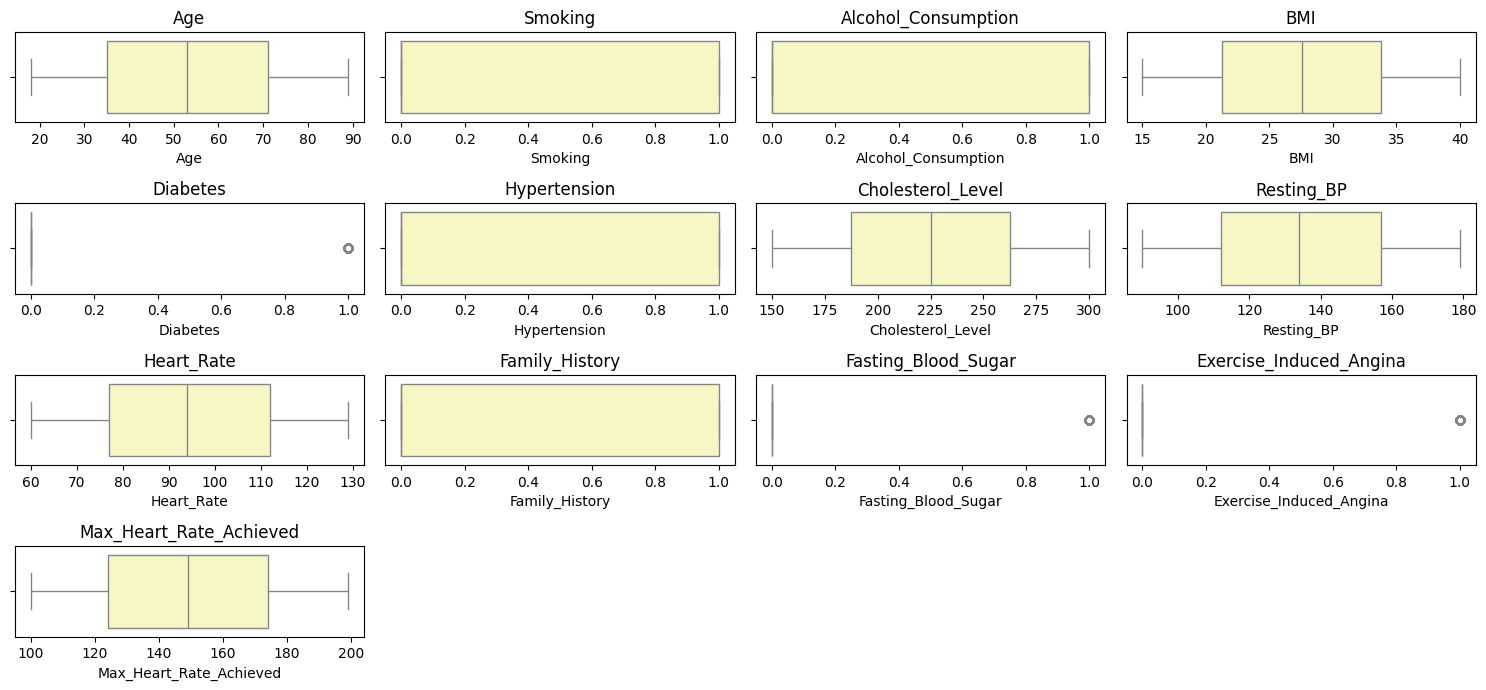

In [ ]:

plt.figure(figsize=(15,10))

for i, col in enumerate(num_col,1):
    plt.subplot(6,4,i)
    sns.boxplot(x=dataset[col], palette='Spectral')
    plt.title(col)

plt.tight_layout()
plt.show()

V našem datadsetu nejsou.

# Datové typy - one hot encoding vs ordinal encoding

In [ ]:
dataset['Gender'] = dataset_init['Gender']
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
## textové sloupce
#dataset.describe(include="object").T


In [ ]:
# gender -> binární -> jednoduše převedeme na 0 a 1
encoding_pohlavi = {"Male": 1, "Female": 0}
dataset["Gender"] = dataset["Gender"].apply(lambda pohlavi: encoding_pohlavi[pohlavi])

In [ ]:
dataset['Gender'].unique()


array([0, 1])

In [ ]:
dataset["Physical_Activity_Level"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [ ]:
# aktivitu dokážeme seřadit -> neznám associate, poradil copilot, kam zařadit
encoding_aktivita = {"Low":0,
                     "Moderate":1,
                     "High":2,}
dataset["Physical_Activity_Level"] = dataset["Physical_Activity_Level"].apply(lambda aktivita: encoding_aktivita[aktivita])

In [ ]:
dataset["Physical_Activity_Level"].unique()

array([1, 0, 2])

In [ ]:
dataset["Stress_Level"].unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [ ]:
# stres dokážeme seřadit -> neznám associate, poradil copilot, kam zařadit
encoding_stres = {"Low":0,
                     "Moderate":1,
                     "High":2,}
dataset["Stress_Level"] = dataset["Stress_Level"].apply(lambda stres: encoding_stres[stres])

In [ ]:
dataset["Stress_Level"].unique()

array([1, 0, 2])

In [ ]:
# Chest_Pain_Type
dataset["Chest_Pain_Type"].unique()

array(['Non-anginal', 'Asymptomatic', 'Typical', 'Atypical'], dtype=object)

In [ ]:
# bolest dokážeme seřadit -> definujeme: Non-anginal - 0', 'Asymptomatic - 1', 'Typical - 2', 'Atypical - 3
encoding_bolest = {"Non-anginal":0,
                     "Asymptomatic":1,
                     "Typical":2,
                     "Atypical":3,}
dataset["Chest_Pain_Type"] = dataset["Chest_Pain_Type"].apply(lambda bolest: encoding_bolest[bolest])

In [ ]:
# Chest_Pain_Type
dataset["Chest_Pain_Type"].unique()

array([0, 1, 2, 3])

In [ ]:
# Thalassemia
dataset["Thalassemia"].unique()

array(['Reversible defect', 'Normal', 'Fixed defect'], dtype=object)

In [ ]:
# Thalassemia dokážeme seřadit -> definujeme: Reversible defect - 0', 'Normal - 1', 'Fixed defect - 2'
encoding_talasemie = {"Reversible defect":0,
                     "Normal":1,
                     "Fixed defect":2,}
dataset["Thalassemia"] = dataset["Thalassemia"].apply(lambda talasemie: encoding_talasemie[talasemie])

In [ ]:
# Thalassemia
dataset["Thalassemia"].unique()

array([0, 1, 2])

In [ ]:
# ECG_Results
dataset["ECG_Results"].unique()

array(['Normal', 'ST-T abnormality', 'Left Ventricular Hypertrophy'],
      dtype=object)

In [ ]:
# ECG_Results dokážeme seřadit -> definujeme:  Normal - 0', 'ST-T abnormality - 1', 'Left Ventricular Hypertrophy - 2'
encoding_ekg = {"Normal":0,
                     "ST-T abnormality":1,
                     "Left Ventricular Hypertrophy":2,}
dataset["ECG_Results"] = dataset["ECG_Results"].apply(lambda ekg: encoding_ekg[ekg])

In [ ]:
# ECG_Results
dataset["ECG_Results"].unique()

array([0, 1, 2])

In [ ]:
# vracení puvodních hodnot do dataset
dataset["Heart_Attack_Risk"] = dataset_init["Heart_Attack_Risk"]

In [ ]:
# Heart_Attack_Risk
dataset["Heart_Attack_Risk"].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

In [ ]:
# infarkt dokážeme seřadit -> neznám associate, poradil copilot, kam zařadit
encoding_infarkt = {"Low":0,
                     "Moderate":1,
                     "High":2,}
dataset["Heart_Attack_Risk"] = dataset["Heart_Attack_Risk"].apply(lambda infarkt: encoding_infarkt[infarkt])

In [ ]:
# Heart_Attack_Risk
dataset["Heart_Attack_Risk"].unique()

array([0, 1, 2])

In [ ]:
#dataset['Heart_Attack_Risk'] = dataset['Heart_Attack_Risk'].apply(lambda H: 1 if H == 2 else H)


In [ ]:
#dataset["Heart_Attack_Risk"].unique()

In [ ]:
ProfileReport(dataset)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
if APLIKOVAT_KORELACI:
  # v absolutní hodnotě vezmu hodnoty korelace vůči Class (cílová proměnná a porovnám s tresholdem)
  filter = abs(corr["Heart_Attack_Risk"]) > TRESHOLD
  # neumím pracovat s pandas.Series -> přetypuji do pandas.DataFrame
  filter = pd.DataFrame(filter)
  # vyextrahovat jména sloupců ,která splňují podmínku - treshold
  relevantni_sloupce = list(filter[filter["Heart_Attack_Risk"] == True].index)
  # vyber jenom relevantní sloupce
  dataset = dataset[relevantni_sloupce]

In [ ]:
# redukce dat pro rychlejší výpočty a nepadání na paměti
if VZOREK_DAT:
  dataset = dataset.sample(VELIKOST_VZORKU)

# Rozdělení featury / cílová proměnná

>>> from collections import Counter
>>> from sklearn.datasets import make_classification
>>> from imblearn.over_sampling import SMOTE
>>> X, y = make_classification(n_classes=2, class_sep=2,
... weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
... n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
>>> print('Original dataset shape %s' % Counter(y))
Original dataset shape Counter({{1: 900, 0: 100}})
>>> sm = SMOTE(random_state=42)
>>> X_res, y_res = sm.fit_resample(X, y)
>>> print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({{0: 900, 1: 900}})

In [ ]:
# cílová proměnná je Heart attack
y = dataset["Heart_Attack_Risk"]
# zbytek featury
X = dataset.drop(columns=["Heart_Attack_Risk"])

In [ ]:
if SMOTE_UPSCALING:
  sm = SMOTE(random_state=42)
  X, y = sm.fit_resample(X, y)

Škálování

In [ ]:
# zajistíme stejné měřítko provšechny sloupce od 0 - 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# převedeme na dataframe tabulku, pro lepší čitelnost
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Rozdělení - train / test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


# Modelování

In [ ]:
# příprava konfigurace -> každý model importuji jinak a má vlastní parametry
# do slovníku pod každý model uložím importovaný model a parametry
modely = {
    "knn": {"model": KNeighborsClassifier(), "parametry":{'n_neighbors':(3, 5, 7, 9), 'weights':["uniform", "distance"]}},
    "dt": {"model": DecisionTreeClassifier(), "parametry":{'splitter':("best", "random"), 'max_features':(None, "sqrt"), 'criterion':["gini", "entropy"]}},
    "lr": {"model": LogisticRegression(), "parametry":{'penalty':(None, "l1", "l2"), 'C':(0.1, 1, 10), 'solver':["liblinear", "lbfgs"]}},
    "rf": {"model": RandomForestClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    "ab": {"model": AdaBoostClassifier(), "parametry":{'n_estimators':(50, 100, 200)}},
    #"lsvm": {"model": LinearSVC(), "parametry":{'C':(0.1, 1, 10), "loss": ["hinge", "squared_hinge"]}},
    "svm": {"model": SVC(probability=True), "parametry":{'C':(0.1, 1, 10), "kernel" : ("poly", "rbf"), "gamma": ("scale", "auto")}}
}

In [ ]:
# list pro ukládání výsledků
results = []
nejlepsi_modely = {}
# pro všechny modely, které jsem si nachystal ve slovníku modely
for model, nastaveni in modely.items():
  print(f"Zpracovávám {model} ...")
  # grid search pro daný model
  gs = GridSearchCV(nastaveni["model"], nastaveni["parametry"], cv=2, scoring='f1_macro')
  gs.fit(X_train, y_train)
  # po tréninku pomocí grid search vybereme nejlepší kombinaci parametrů pro daný model
  # a uložíme si nejlepší model
  best_model = gs.best_estimator_
  # uložit si pro budoucí využití nejlepší modely
  nejlepsi_modely[model] = best_model
  # predikce na testovacích datech
  y_pred = best_model.predict(X_test)
  y_pred_prob = best_model.predict_proba(X_test)

  # zapsání výsledků pro daný model
  results.append({"metric": "f1", "model": model, "value": f1_score(y_test, y_pred, average = 'macro')})
  results.append({"metric": "auc", "model": model, "value": roc_auc_score(y_test, y_pred_prob, multi_class='ovr')})
  results.append({"metric": "recall", "model": model, "value": recall_score(y_test, y_pred, average = 'macro')})

Zpracovávám knn ...
Zpracovávám dt ...
Zpracovávám lr ...
Zpracovávám rf ...
Zpracovávám ab ...
Zpracovávám svm ...


In [ ]:
# zpracování posbíraných výsledků list -> do pandas dataframu
results_df = pd.DataFrame.from_records(results)

# vykreslení výsledků jako bar chart pro různé metriky a modely
ax = sns.barplot(x='metric', y='value', hue='model', data=results_df)
# přidání hodnot nad sloupce
for p in ax.patches:
  ax.annotate(
      format(p.get_height(), '.2f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha = 'center',
      va = 'center',
      xytext = (0, 9),
      textcoords = 'offset points')

plt.show()

In [ ]:
plt.plot()
plt.show

In [ ]:
ax
#p
#ax.patches

In [ ]:
results_df

Analýza významu featur
- podle decision tree nebo logistické regrese najít nejlepší prediktory
- vzít všechny featury, nebo jenom nějaké, ...

In [ ]:
# thety od featur -> čím větší tím lepší prediktor
abs(pd.DataFrame(nejlepsi_modely["lr"].coef_, columns=X.columns)).T.sort_values(0, ascending=False)

In [ ]:
# nejlépe se jeví random forest -> predikce pro test data
y_pred_rf = nejlepsi_modely["rf"].predict(X_test)

In [ ]:
# confusion matice pro predikce nejlepšího rf modelu
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()